# Programming Assignment 2 (Binary classification using Logistic Regression and Decision Tree)
**Dataset:** `Admit.csv` (GRE, GPA, Rank, Admit)

This notebook follows the assignment spec:
- EDA (20%)
- Logistic Regression **from scratch** (20%)
- Logistic Regression with scikit-learn + comparison (20%)
- Decision Tree with scikit-learn + visualization (20%)
- Graphs, visualizations and conclusions 20%


## 1) Set up & imports

In [3]:
# setup & imports 
# please run this part before you proceed further
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree


## 2) Load Data

In [7]:
# load data ===
# make sure that Admit.csv is in the same folder as this notebook
df = pd.read_csv('Admit.csv')
print(df.head())
print(df.info())
print(df.describe(include='all'))
print("It looks like there is no missing data, so we are good to onto the next step")


   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   admit   400 non-null    int64  
 1   gre     400 non-null    int64  
 2   gpa     400 non-null    float64
 3   rank    400 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 12.6 KB
None
            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000

## 3) Exploratory Data Analysis (EDA)

Number of elements between admits and non-admits:
admit
0    273
1    127
Name: count, dtype: int64
Number of elements between admits and non-admits (normalized):
admit
0    0.6825
1    0.3175
Name: proportion, dtype: float64


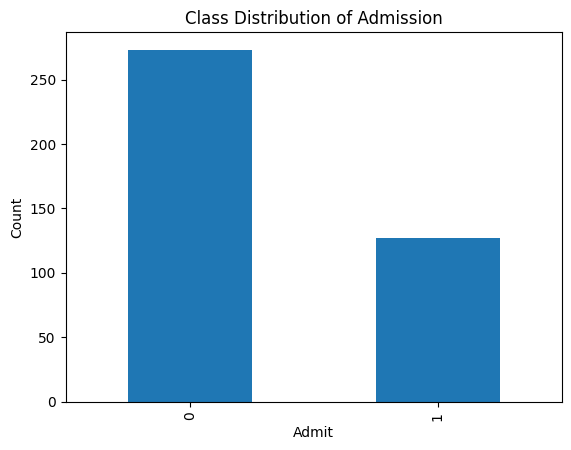

From this data above, we can see that the data is slightly imbalance with the scale 68-31 but it is still fine.


In [8]:
# Checking for balance
print("Number of elements between admits and non-admits:")
print(df['admit'].value_counts())

print("Number of elements between admits and non-admits (normalized):")
print(df['admit'].value_counts(normalize=True))

df['admit'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Admission')
plt.xlabel('Admit')
plt.ylabel('Count')
plt.show()

print('From this data above, we can see that the data is slightly imbalance with the scale 68-31 but it is still fine.')

## 4) Logistic Regression (from scratch) — Implementation

In [ ]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.1, n_iter=2000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.w = None
        self.b = 0.0

    def train(self, X, y):
        X = X.values if isinstance(X, pd.DataFrame) else X
        y = y.values if isinstance(y, pd.Series) else y
        n, d = X.shape
        self.w = np.zeros(d, dtype=float)
        self.b = 0.0 if self.fit_intercept else 0.0

        for it in range(self.n_iter):
            z = X @ self.w + (self.b if self.fit_intercept else 0.0)
            p = sigmoid(z)

            # gradients (log-likelihood ascent)
            grad_w = X.T @ (y - p) / n
            grad_b = np.sum(y - p) / n if self.fit_intercept else 0.0

            # update
            self.w += self.learning_rate * grad_w
            if self.fit_intercept:
                self.b += self.learning_rate * grad_b

            if self.verbose and (it+1) % (self.n_iter//10) == 0:
                # Compute (negative) log loss for monitoring
                eps = 1e-9
                loss = -np.mean(y * np.log(p + eps) + (1-y) * np.log(1 - p + eps))
                print(f"iter {it+1:4d} | loss {loss:.4f}")

        return self

    def predict_probability(self, X):
        X = X.values if isinstance(X, pd.DataFrame) else X
        z = X @ self.w + (self.b if self.fit_intercept else 0.0)
        return sigmoid(z)

    def predict(self, X, threshold=0.5):
        return (self.predict_probability(X) >= threshold).astype(int)


# select data, we only care about gpa and gre, rank doesn't matter. admit and not admit is the y value
X = df[['gre', 'gpa']]   
y = df['admit']          

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train and evaluate custom linear regression model
custom_logistic_regression = CustomLogisticRegression(learning_rate=0.1, n_iter=5000, verbose=True)
custom_logistic_regression.train(X_train_scaled, y_train)
y_pred = custom_logistic_regression.predict(X_test_scaled)

print("Custom Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, zero_division=0))
print("Recall:", recall_score(y_test, y_pred, zero_division=0))
print("F1:", f1_score(y_test, y_pred, zero_division=0))


iter  500 | loss 0.5956
iter 1000 | loss 0.5956
iter 1500 | loss 0.5956
iter 2000 | loss 0.5956
iter 2500 | loss 0.5956
iter 3000 | loss 0.5956
iter 3500 | loss 0.5956
iter 4000 | loss 0.5956
iter 4500 | loss 0.5956
iter 5000 | loss 0.5956
Scratch Logistic Regression:
Accuracy: 0.66
Precision: 0.25
Recall: 0.03125
F1: 0.05555555555555555


## 7) Logistic Regression (scikit-learn) + Comparison

In [16]:
# === Logistic Regression (scikit-learn) + comparison ===
lr = LogisticRegression(max_iter=5000, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:,1]

print("Sklearn Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_lr, zero_division=0))
print("F1:", f1_score(y_test, y_pred_lr, zero_division=0))


Sklearn Logistic Regression:
Accuracy: 0.66
Precision: 0.25
Recall: 0.03125
F1: 0.05555555555555555


## 8) Decision Tree + Visualization

Decision Tree:
Accuracy: 0.72
Precision: 0.8333333333333334
Recall: 0.15625
F1: 0.2631578947368421

Confusion Matrix:
 [[67  1]
 [27  5]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.99      0.83        68
           1       0.83      0.16      0.26        32

    accuracy                           0.72       100
   macro avg       0.77      0.57      0.55       100
weighted avg       0.75      0.72      0.65       100



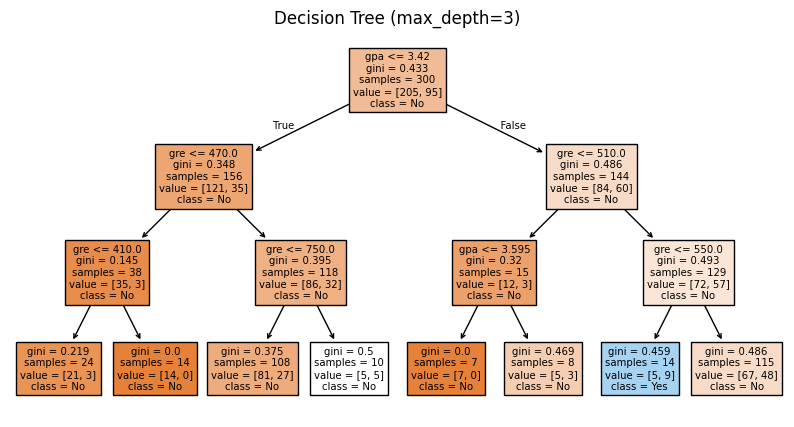


Feature importances:
 gpa    0.507808
gre    0.492192
dtype: float64


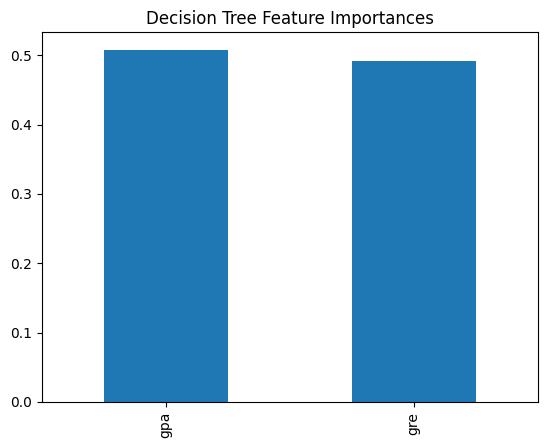

In [17]:
# === Decision Tree (scikit-learn) ===
# You can tune: criterion=('gini','entropy','log_loss'), max_depth, min_samples_split, etc.
tree = DecisionTreeClassifier(random_state=42, max_depth=3)
tree.fit(X_train, y_train)  # Trees handle unscaled, one-hot input fine

y_pred_tree = tree.predict(X_test)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree, zero_division=0))
print("Recall:", recall_score(y_test, y_pred_tree, zero_division=0))
print("F1:", f1_score(y_test, y_pred_tree, zero_division=0))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree, zero_division=0))

# Visualize tree
plt.figure(figsize=(10,5))
plot_tree(tree, feature_names=X_train.columns, class_names=['No','Yes'], filled=True)
plt.title("Decision Tree (max_depth=3)")
plt.show()

# (Optional) Feature importance
importances = pd.Series(tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print("\nFeature importances:\n", importances)
importances.plot(kind='bar')
plt.title("Decision Tree Feature Importances")
plt.show()


## 9) Discussion / Conclusions

In [18]:
# === Short Discussion & Conclusions ===
# TODO: In 5–10 sentences, summarize your findings.
# - Did scaling help the logistic regression from scratch converge?
# - How similar are your scratch vs sklearn metrics? If different, why?
# - Which features matter most? Does Rank appear important?
# - How does the tree compare to logistic regression (accuracy/recall on the positive class)?
# - Any class-imbalance issues? Did stratification help keep class proportions?
# - Add at least 2 plots (ROC curves, confusion matrices, histograms, or the tree) and discuss them.
